In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_churn_1.csv')

In [3]:
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### No. of Male and Female as customers

In [5]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [6]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

### 0 and 1 as considered as young and senior citizens respectively.

### No. of customers using DSL internet service

In [7]:
# Assuming your DataFrame is named df and contains columns like 'customerID' and 'InternetService'
dsl_count = df[df['InternetService'] == 'DSL']['customerID'].count()
print(f"Number of customers using DSL: {dsl_count}")


Number of customers using DSL: 2421


### Senior Female citizens using payment method as mailed check.

In [8]:
# Assuming your DataFrame is named df
#filtered_data = df.groupby(['gender', 'SeniorCitizen', 'PaymentMethod']).size().reset_index(name='count')
filtered_data = df.groupby(['gender', 'SeniorCitizen', 'PaymentMethod']).size().reset_index()

# Filter for Female, SeniorCitizen = 1, and PaymentMethod = 'Mailed check'
filtered_data1 = filtered_data[(filtered_data['gender'] =='Female') &
                              (filtered_data['SeniorCitizen'] == 1) &
                              (filtered_data['PaymentMethod'] == 'Mailed check')]

# Display the count
female_senior_mailed_check_count = filtered_data1.sum()
print(f"Number of females who are SeniorCitizen and use Mailed check:{female_senior_mailed_check_count}")


Number of females who are SeniorCitizen and use Mailed check:gender                 Female
SeniorCitizen               1
PaymentMethod    Mailed check
0                          50
dtype: object


In [9]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

### Customers having tenure < 10 and Total charges < 500

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

filtered_data_2 = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]
len(filtered_data_2)


2233

In [11]:
df.isnull().sum().sum()

11

In [12]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Distribution of Internet Service

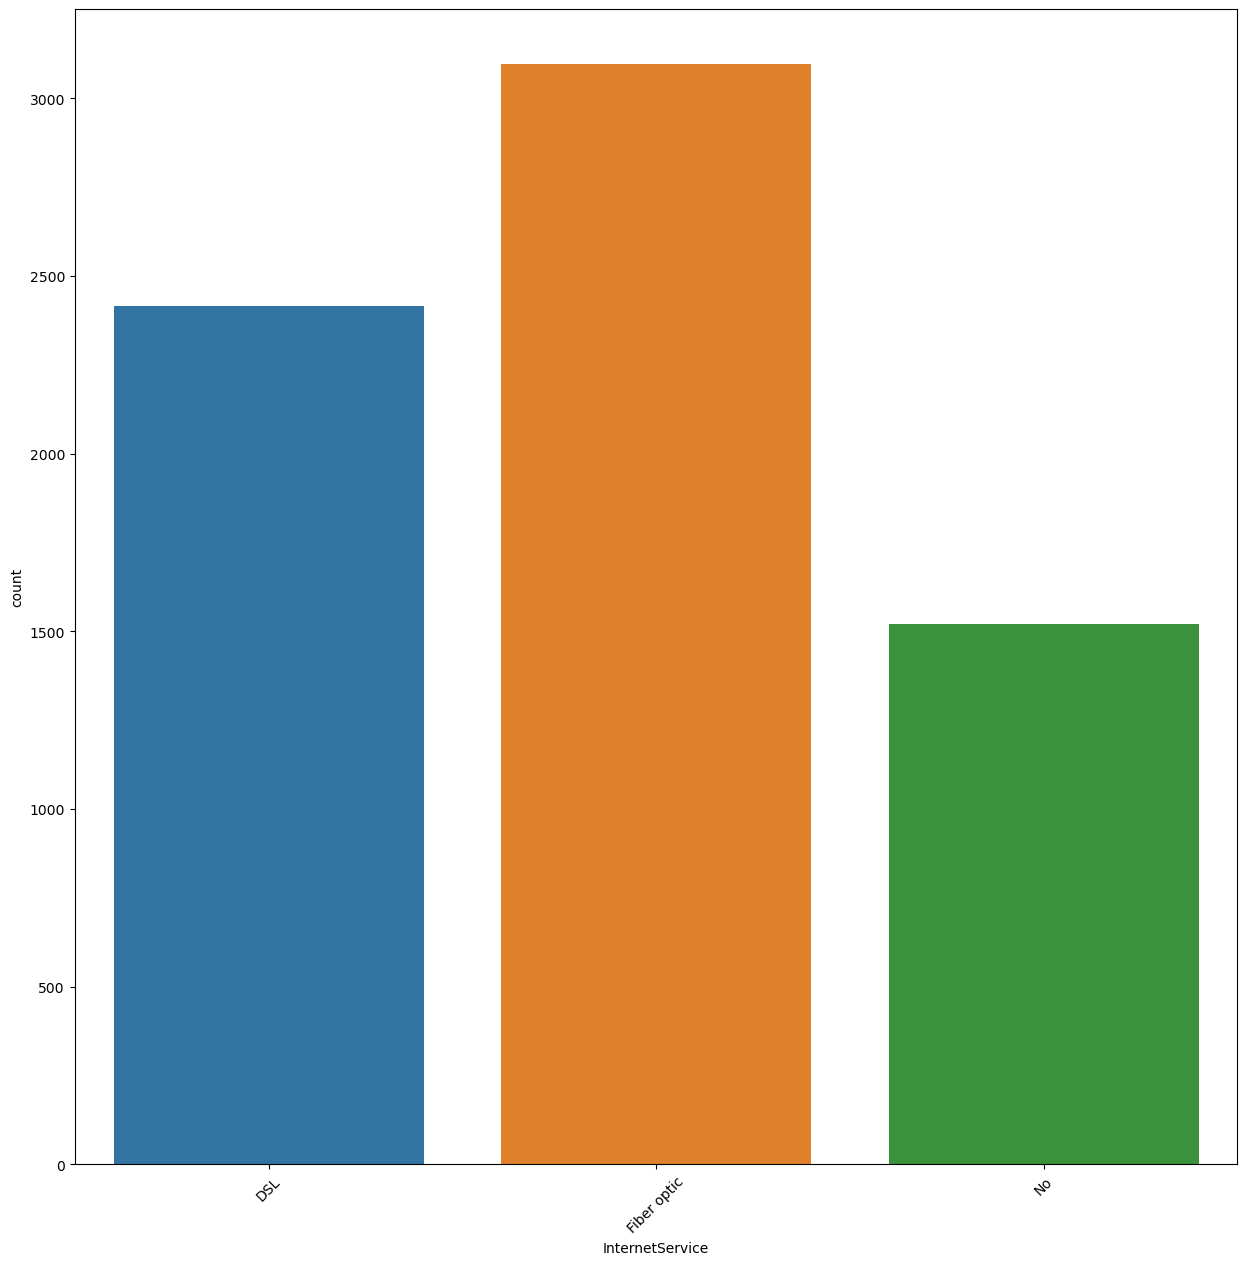

In [13]:
plt.figure(figsize=(15,15))
sns.countplot(data = df, x = df.InternetService)
plt.xticks(rotation=45)
plt.show()

### Mapping Churn column - 0: NO and 1: YES

In [14]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

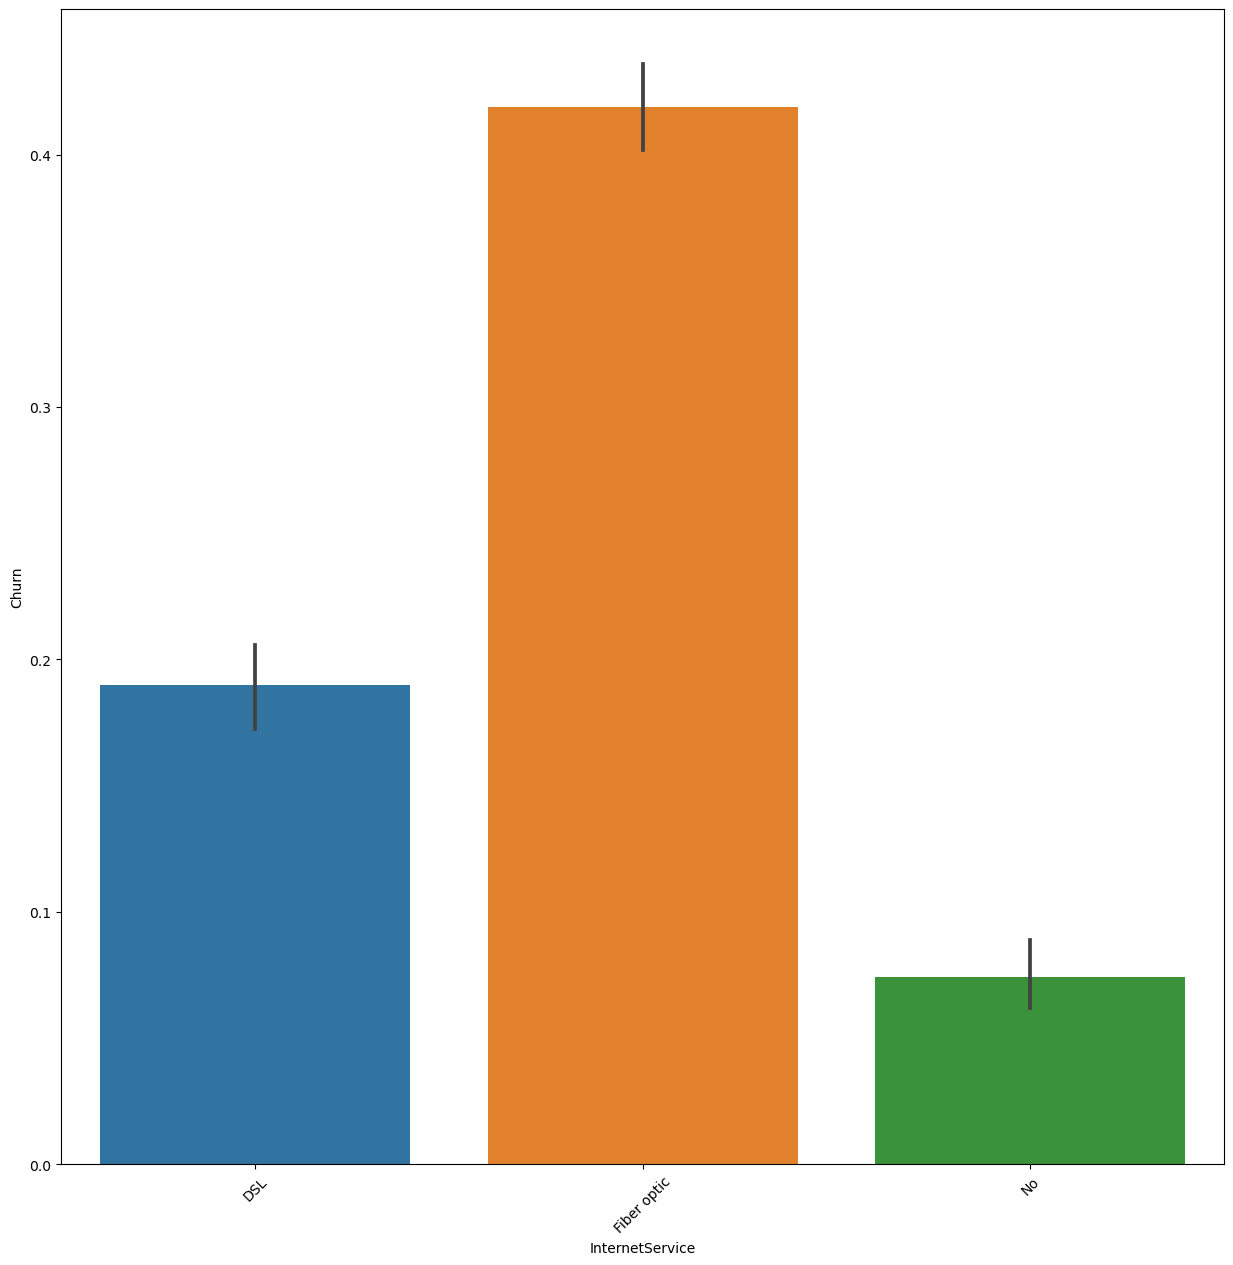

In [15]:
plt.figure(figsize=(15,15))
sns.barplot(data = df, x = df.InternetService, y=df.Churn)
plt.xticks(rotation=45)
plt.show()

### Customer churn based on its gender

In [16]:
data = df[['gender','Churn']]

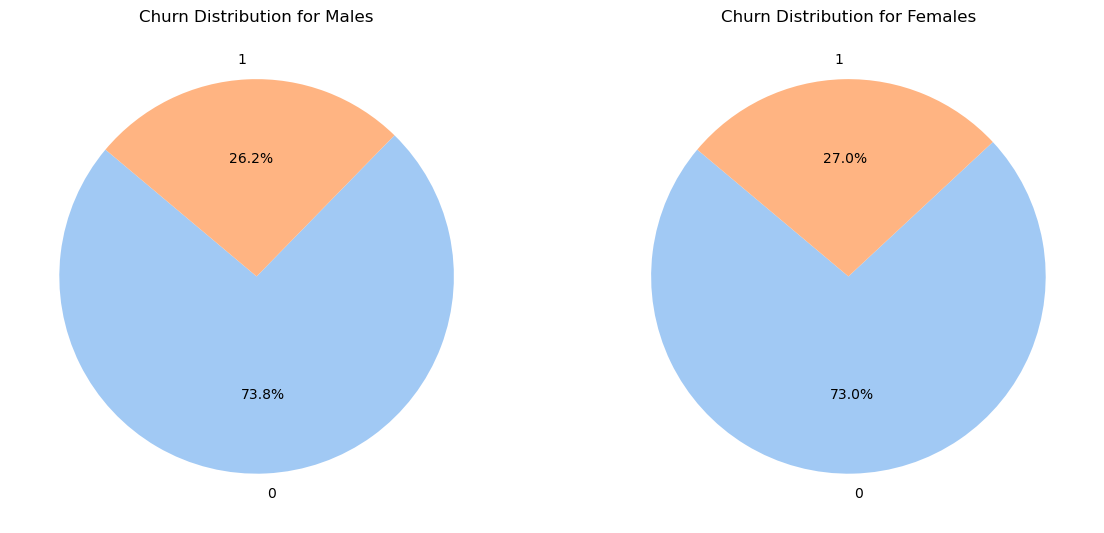

In [17]:
# Create DataFrame
df_plot = pd.DataFrame(data)

# Get counts for each combination of Gender and Churn
churn_counts = df_plot.groupby(['gender', 'Churn']).size().reset_index(name='Counts')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for Male
male_data = churn_counts[churn_counts['gender'] == 'Male']
axes[0].pie(male_data['Counts'], labels=male_data['Churn'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[0].set_title('Churn Distribution for Males')

# Plot for Female
female_data = churn_counts[churn_counts['gender'] == 'Female']
axes[1].pie(female_data['Counts'], labels=female_data['Churn'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1].set_title('Churn Distribution for Females')

# Show plot
plt.show()

### Selecting tenure and Churn as independent and target varible respectively.

In [18]:
df1 = df[['tenure','Churn']]
df1

,tenure,Churn
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1
...,...,...
7038,24,0
7039,72,0
7040,11,0
7041,4,1


In [19]:
df1['Churn'].unique()

array([0, 1], dtype=int64)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
for col in df1.columns:
    if df1[col].dtype=="object":
        df1[col]=le.fit_transform(df[col])

In [22]:
df1

,tenure,Churn
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1
...,...,...
7038,24,0
7039,72,0
7040,11,0
7041,4,1


In [23]:
x = df1.drop(['Churn'],axis = 1)
y = df1['Churn']


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras

### Model - 1

In [26]:
model_1 = Sequential([
    Dense(12, input_shape=(1,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


C:\Users\Shreyas\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

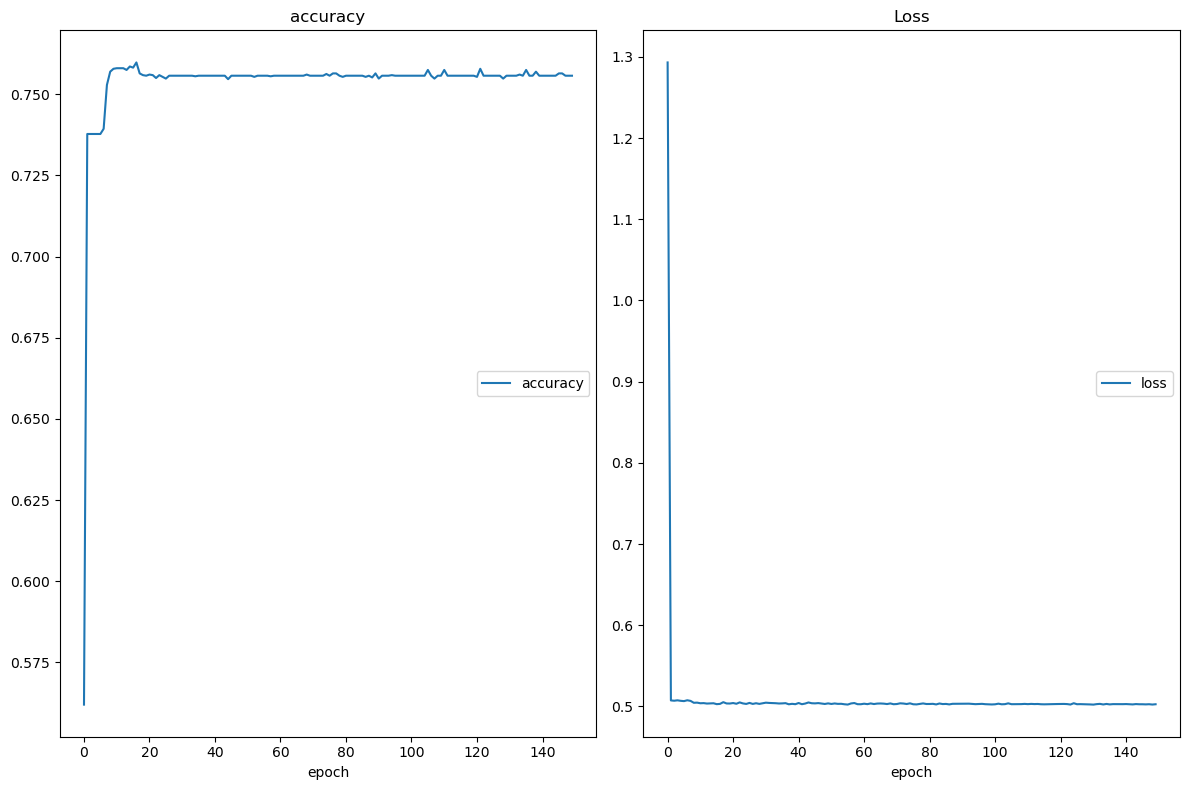

accuracy
	accuracy         	 (min:    0.562, max:    0.760, cur:    0.756)
Loss
	loss             	 (min:    0.502, max:    1.293, cur:    0.503)
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7455 - loss: 0.5116


In [28]:
Analysis_1 = model_1.fit(x_train, y_train, epochs=150, batch_size=30, verbose=1, callbacks=[PlotLossesKeras()])

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [30]:
y_pred1 = model_1.predict(x_test)
y_pred_binary1 = (y_pred1 > 0.5).astype(int)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
y_test

942     0
3730    1
1761    0
2283    1
1872    0
       ..
6777    0
2103    0
4855    0
4927    0
390     0
Name: Churn, Length: 1407, dtype: int64

In [32]:
y_pred_binary1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [33]:
confusion_matrix(y_pred_binary1,y_test)

array([[921, 260],
       [ 92, 134]], dtype=int64)

In [34]:
unique, counts = np.unique(y_pred_binary1, return_counts=True)
pred_counts = dict(zip(unique, counts))

print("Count of 0s and 1s in y_pred_binary:")
print(pred_counts)

Count of 0s and 1s in y_pred_binary:
{0: 1181, 1: 226}


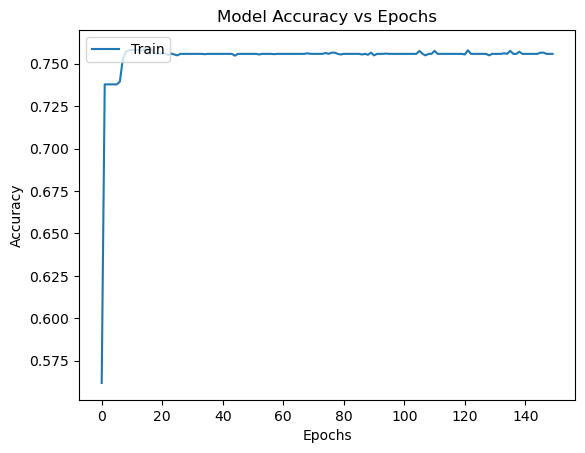

In [35]:
plt.plot(Analysis_1.history['accuracy'])
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()


### With Dropout - Model 2

In [40]:
from tensorflow.keras.layers import Dropout

In [41]:
model_2 = Sequential([
    Dense(12, input_shape=(1,), activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


In [42]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

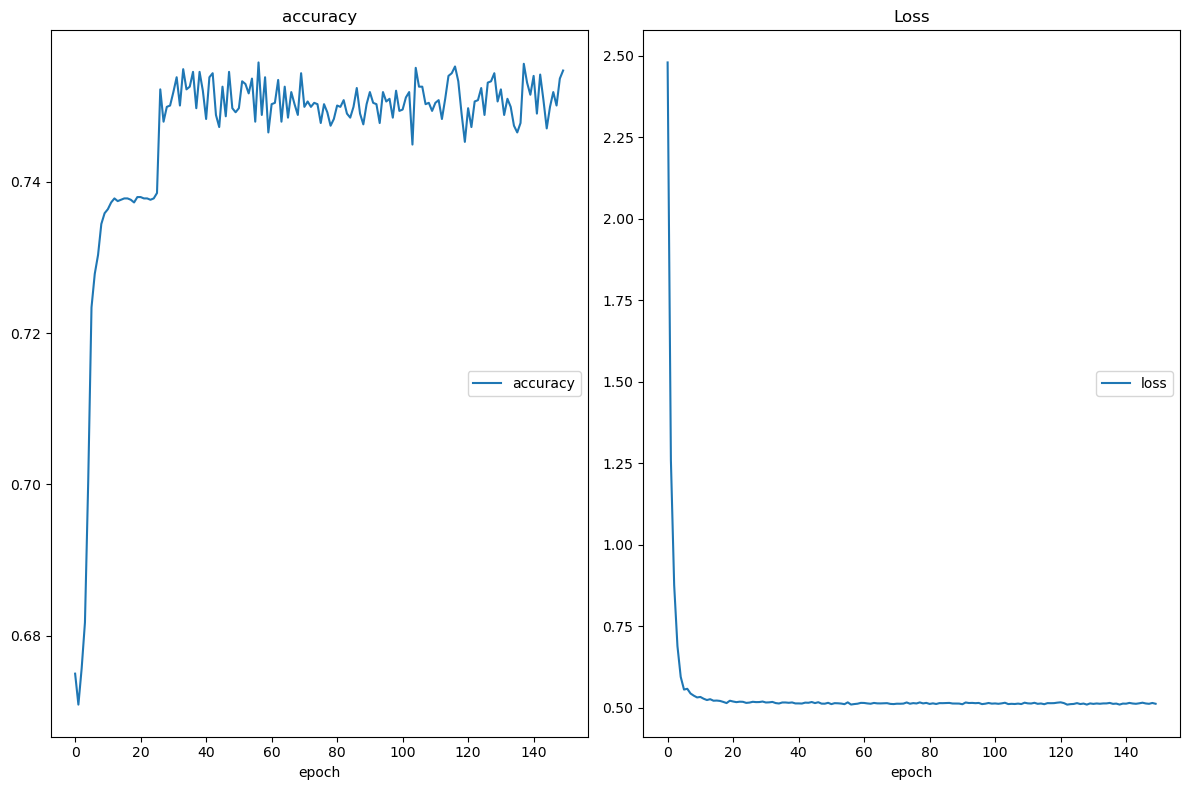

accuracy
	accuracy         	 (min:    0.671, max:    0.756, cur:    0.755)
Loss
	loss             	 (min:    0.510, max:    2.479, cur:    0.512)
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7520 - loss: 0.5114


In [43]:
Analysis_2 = model_2.fit(x_train, y_train, epochs=150, batch_size=30, verbose=1, callbacks=[PlotLossesKeras()])

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [45]:
y_pred2 = model_2.predict(x_test)
y_pred_binary2 = (y_pred2 > 0.5).astype(int)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [46]:
y_pred2

array([[0.2868011 ],
       [0.16106428],
       [0.15805984],
       ...,
       [0.14098118],
       [0.26010934],
       [0.27325192]], dtype=float32)

In [47]:
y_pred_binary2

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [48]:
confusion_matrix(y_pred_binary2,y_test)

array([[942, 282],
       [ 71, 112]], dtype=int64)

In [49]:
unique, counts = np.unique(y_pred_binary2, return_counts=True)
pred_counts = dict(zip(unique, counts))

print("Count of 0s and 1s in y_pred_binary:")
print(pred_counts)

Count of 0s and 1s in y_pred_binary:
{0: 1224, 1: 183}


### Model - 3 

In [50]:
df2 = df[['tenure','TotalCharges','Churn']]
df2

,tenure,TotalCharges,Churn
0,1,29.85,0
1,34,1889.50,0
2,2,108.15,1
3,45,1840.75,0
4,2,151.65,1
...,...,...,...
7038,24,1990.50,0
7039,72,7362.90,0
7040,11,346.45,0
7041,4,306.60,1


In [51]:
for col in df2.columns:
    if df2[col].dtype=="object":
        df2[col]=le.fit_transform(df[col])

In [52]:
df2


,tenure,TotalCharges,Churn
0,1,29.85,0
1,34,1889.50,0
2,2,108.15,1
3,45,1840.75,0
4,2,151.65,1
...,...,...,...
7038,24,1990.50,0
7039,72,7362.90,0
7040,11,346.45,0
7041,4,306.60,1


In [53]:
x1 = df2.drop(['Churn','TotalCharges'],axis = 1)
y1 = df2['Churn']

In [54]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.2, random_state=100)

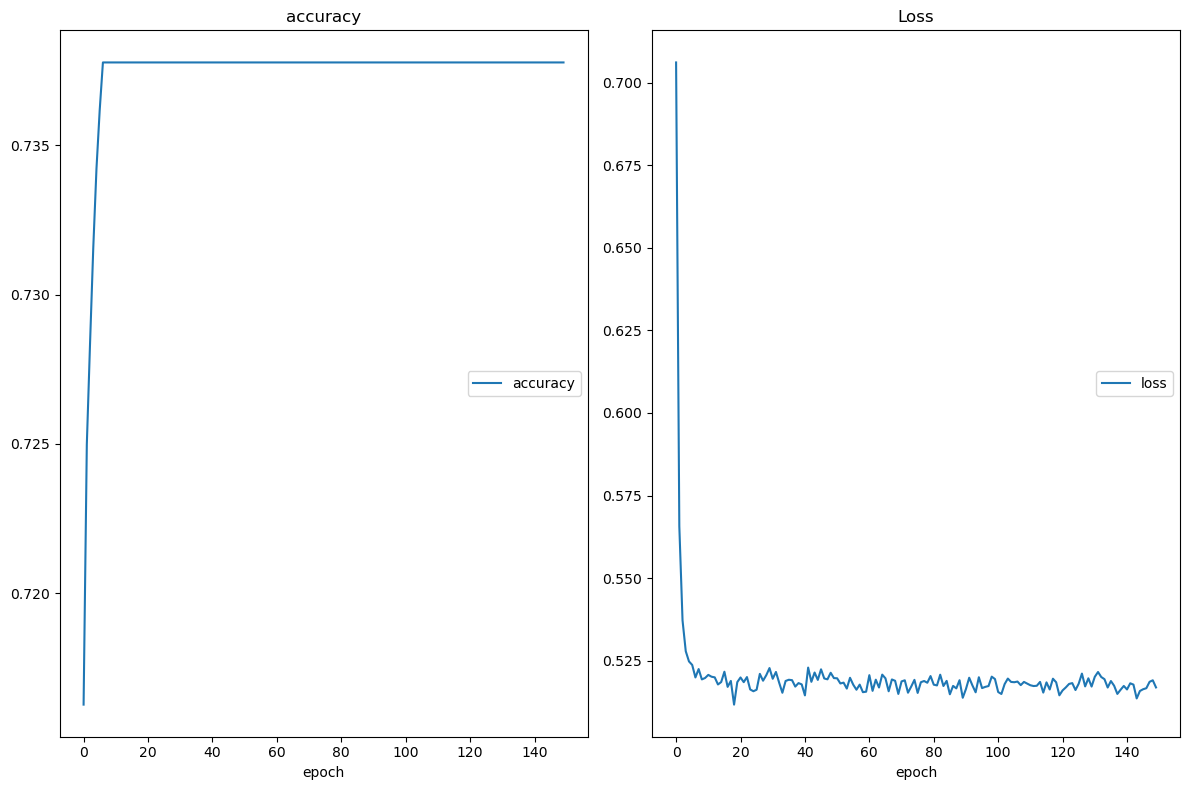

accuracy
	accuracy         	 (min:    0.716, max:    0.738, cur:    0.738)
Loss
	loss             	 (min:    0.512, max:    0.706, cur:    0.517)
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7419 - loss: 0.5178


In [55]:
model_3 = Sequential([
    Dense(12, input_shape=(1,), activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
Analysis_3 = model_3.fit(x1_train, y1_train, epochs=150, batch_size=30, verbose=1, callbacks=[PlotLossesKeras()])

In [56]:
y_pred3 = model_3.predict(x1_test)
y_pred_binary3 = (y_pred3 > 0.5).astype(int)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [57]:
confusion_matrix(y_pred_binary3,y1_test)

array([[1013,  394],
       [   0,    0]], dtype=int64)

## Conclusions

### 1. The customer churn data is studied by using neural networks.
### 2. The 3 different option with Sequential as a model have been used with Dense and Droput layers. 
### 3. In all models Optimizer - Adam, loss - Crossentropy and Medtrics - Accuracy as parameters are used.
### 4. Customer churn is higher for those who are using Fiber Optic as Internet Service.
### 5. Majority of customers i.e. 73-74%, irrespective of their gender, will not churn.  
### 6. All 3 models have shown accuracy of 74-75%.
### 7. In the model -3, the 'TotalCharges' column was selected as an independent variable in addition to 'tenure'. 
### 8. Compared to the results of the confusion matrix using the model-1 & 2, model-3 did not 
###    yield any False positive and False negative values. This seems to be the case of overfitting.